This code gives an introduction to unsupervised learning by solving a clustering problem using **K-Means Clustering** following [this tutorial](https://youtu.be/EItlUEPCIzM).

Replace 'XLABEL' and 'YLABEL' with the respective labels in your data set.

# Problem description
Enter in the text cell below the clustering problem that you're about to work on. 

What is your X and Y label?

Import packages

In [96]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


Import and explore the data set

In [97]:
df = pd.read_csv('originalfile.csv')
df

,Unnamed: 0,name,open,close,high,low,volume
0,1971-02-05,^IXIC,100.00,100.00,100.00,100.00,0.0
1,1971-02-08,^IXIC,100.84,100.84,100.84,100.84,0.0
2,1971-02-09,^IXIC,100.76,100.76,100.76,100.76,0.0
3,1971-02-10,^IXIC,100.69,100.69,100.69,100.69,0.0
4,1971-02-11,^IXIC,101.45,101.45,101.45,101.45,0.0
...,...,...,...,...,...,...,...
41655,2019-08-23,MSFT,137.19,133.39,138.35,132.80,38515386.0
41656,2019-08-23,AAPL,209.43,202.64,212.05,201.00,46882843.0
41657,2019-08-23,GOOGL,1185.17,1153.58,1195.67,1150.00,1813141.0
41658,2019-08-23,AMZN,1793.03,1749.62,1804.90,1745.23,5277898.0


2. Display columns and describe the data set

In [98]:
df.describe()

,open,close,high,low,volume
count,41660.000000,41660.000000,41660.000000,41660.000000,4.166000e+04
mean,592.565369,592.482337,596.681878,587.823401,1.195606e+07
std,1254.603123,1254.463915,1262.142541,1245.789816,2.156350e+07
min,0.090000,0.090000,0.090000,0.090000,0.000000e+00
25%,16.687500,16.727500,17.060000,16.337500,0.000000e+00
50%,89.255000,89.360000,89.875000,88.615000,2.302950e+06
75%,407.637500,407.775000,409.602500,405.975000,1.401524e+07
max,8325.100000,8330.210000,8339.640000,8291.120000,5.910786e+08


Scatter plot

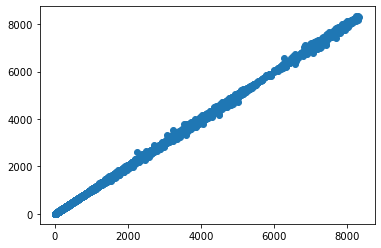

In [99]:
plt.scatter(df.open,df['close'])

Fit and predict three clusters for the data

In [100]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['open','close']])
y_predicted

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

In [101]:
df['cluster']=y_predicted
df.head()

,Unnamed: 0,name,open,close,high,low,volume,cluster
0,1971-02-05,^IXIC,100.00,100.00,100.00,100.00,0.0,0
1,1971-02-08,^IXIC,100.84,100.84,100.84,100.84,0.0,0
2,1971-02-09,^IXIC,100.76,100.76,100.76,100.76,0.0,0
3,1971-02-10,^IXIC,100.69,100.69,100.69,100.69,0.0,0
4,1971-02-11,^IXIC,101.45,101.45,101.45,101.45,0.0,0


In [102]:
km.cluster_centers_

array([[ 151.31900179,  151.32343506],
       [2125.0351445 , 2124.41150031],
       [5663.00829975, 5662.64786524]])

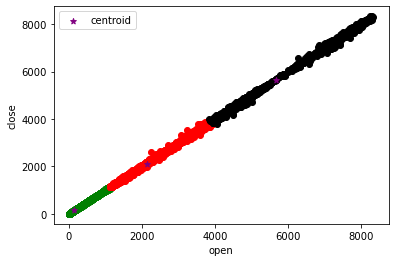

In [103]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.open,df1['close'],color='green')
plt.scatter(df2.open,df2['close'],color='red')
plt.scatter(df3.open,df3['close'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('open')
plt.ylabel('close')
plt.legend()

Fit the model using MinMaxScaler()

In [104]:
scaler = MinMaxScaler()

scaler.fit(df[['close']])
df['open'] = scaler.transform(df[['close']])

scaler.fit(df[['open']])
df['open'] = scaler.transform(df[['open']])

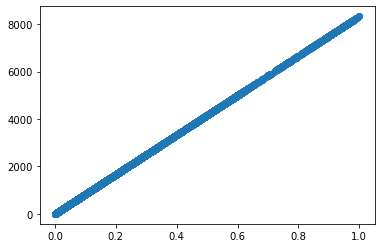

In [105]:
plt.scatter(df.open,df['close'])

In [106]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['open','close']])
y_predicted

array([0, 0, 0, ..., 2, 2, 0], dtype=int32)

In [107]:
df['cluster']=y_predicted
df.head()

,Unnamed: 0,name,open,close,high,low,volume,cluster
0,1971-02-05,^IXIC,0.011994,100.00,100.00,100.00,0.0,0
1,1971-02-08,^IXIC,0.012095,100.84,100.84,100.84,0.0,0
2,1971-02-09,^IXIC,0.012085,100.76,100.76,100.76,0.0,0
3,1971-02-10,^IXIC,0.012077,100.69,100.69,100.69,0.0,0
4,1971-02-11,^IXIC,0.012168,101.45,101.45,101.45,0.0,0


In [108]:
km.cluster_centers_

array([[1.81177686e-02, 1.51013187e+02],
       [6.79793160e-01, 5.66284860e+03],
       [2.54744231e-01, 2.12214001e+03]])

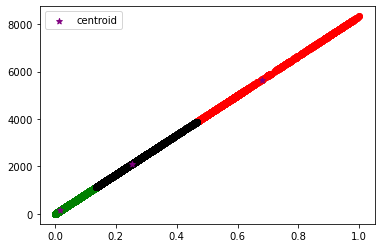

In [109]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.open,df1['close'],color='green')
plt.scatter(df2.open,df2['close'],color='red')
plt.scatter(df3.open,df3['close'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [110]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['open','close']])
    sse.append(km.inertia_)

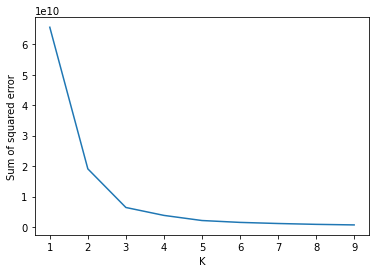

In [111]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)